In [3]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar
from matplotlib.ticker import PercentFormatter

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)

c:\Users\seane\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#First dataset with multiple job titles
df_DA_AUS = df[(df['job_title'].isin(['Data Analyst', 'Data Engineer', 'Senior Data Engineer'])) & (df['job_country'] == 'Australia')].copy()
df_DA_AUS['job_posted_month_no'] = df_DA_AUS['job_posted_date'].dt.month
df_DA_AUS_explode = df_DA_AUS.explode('job_skills')
df_DA_AUS_pivot = df_DA_AUS_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_AUS_pivot.loc['Total'] = df_DA_AUS_pivot.sum()
sorted_columns = df_DA_AUS_pivot.loc['Total'].sort_values(ascending=False).index
df_DA_AUS_pivot = df_DA_AUS_pivot[sorted_columns]
df_DA_AUS_pivot = df_DA_AUS_pivot.drop('Total')
DA_totals = df_DA_AUS.groupby('job_posted_month_no').size()
df_DA_AUS_percent = df_DA_AUS_pivot.div(DA_totals / 100, axis=0)
df_DA_AUS_percent = df_DA_AUS_percent.reset_index()
df_DA_AUS_percent['job_posted_month'] = df_DA_AUS_percent['job_posted_month_no'].map(lambda x: calendar.month_name[x])
df_DA_AUS_percent = df_DA_AUS_percent.set_index('job_posted_month').drop(columns='job_posted_month_no')

In [5]:
# dataset with only 'Data Analyst' job title
df_DA_AUS2 = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Australia')].copy()
df_DA_AUS2['job_posted_month_no'] = df_DA_AUS2['job_posted_date'].dt.month
df_DA_AUS2_explode = df_DA_AUS2.explode('job_skills')
df_DA_AUS2_pivot = df_DA_AUS2_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_AUS2_pivot.loc['Total'] = df_DA_AUS2_pivot.sum()
sorted_columns2 = df_DA_AUS2_pivot.loc['Total'].sort_values(ascending=False).index
df_DA_AUS2_pivot = df_DA_AUS2_pivot[sorted_columns2]
df_DA_AUS2_pivot = df_DA_AUS2_pivot.drop('Total')
DA2_totals = df_DA_AUS2.groupby('job_posted_month_no').size()
df_DA_AUS2_percent = df_DA_AUS2_pivot.div(DA2_totals / 100, axis=0)
df_DA_AUS2_percent = df_DA_AUS2_percent.reset_index()
df_DA_AUS2_percent['job_posted_month'] = df_DA_AUS2_percent['job_posted_month_no'].map(lambda x: calendar.month_name[x])
df_DA_AUS2_percent = df_DA_AUS2_percent.set_index('job_posted_month').drop(columns='job_posted_month_no')


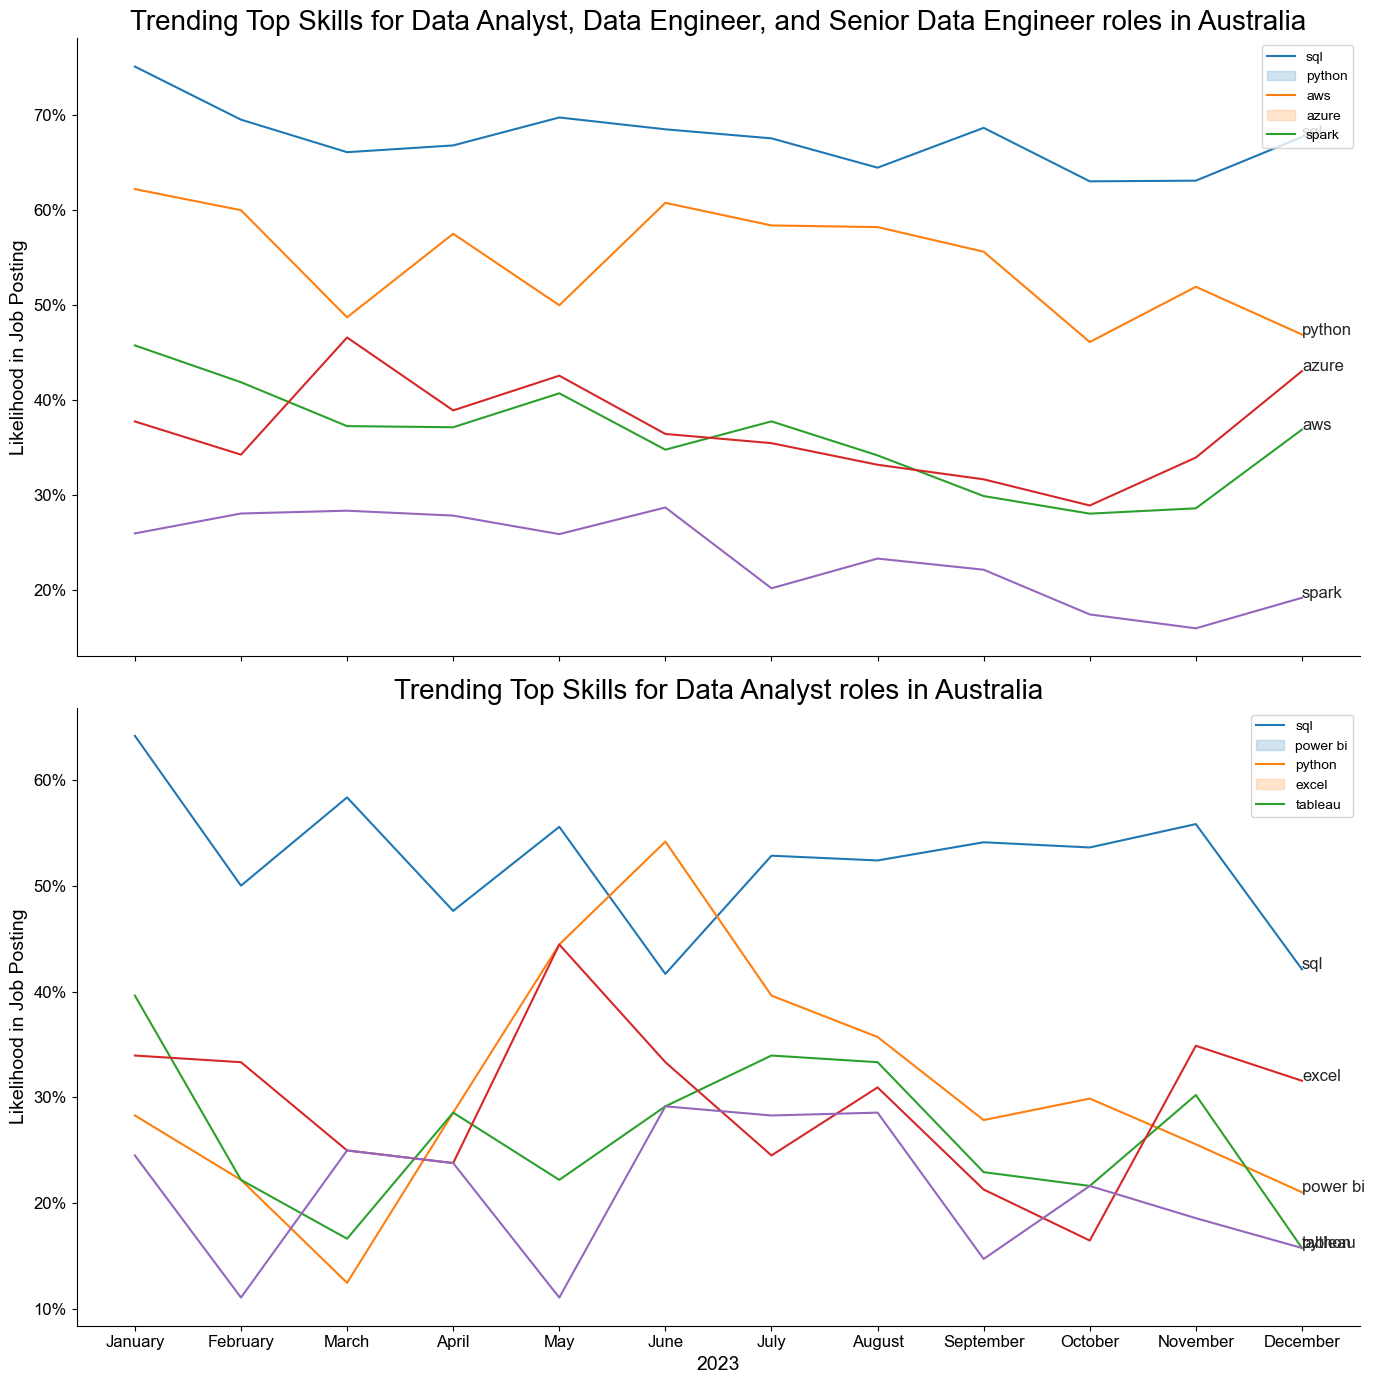

In [6]:
# Plotting both datasets on different subplots
df_plot = df_DA_AUS_percent.iloc[:, :5]
df_plot2 = df_DA_AUS2_percent.iloc[:, :5]

fig, axes = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

# Plot for multiple job titles
sns.lineplot(data=df_plot,dashes = False, palette='tab10', ax=axes[0])
axes[0].set_title('Trending Top Skills for Data Analyst, Data Engineer, and Senior Data Engineer roles in Australia', fontsize=20)
axes[0].set_ylabel('Likelihood in Job Posting', fontsize=14)
axes[0].legend(df_plot.columns, loc='upper right')

# Plot for 'Data Analyst' only
sns.lineplot(data=df_plot2,dashes = False, palette='tab10', ax=axes[1])
axes[1].set_title('Trending Top Skills for Data Analyst roles in Australia', fontsize=20)
axes[1].set_ylabel('Likelihood in Job Posting', fontsize=14)
axes[1].set_xlabel('2023', fontsize=14)
axes[1].legend(df_plot2.columns, loc='upper right')

# Formatting and styling
sns.set_theme(style='ticks')
sns.despine()
for ax in axes:
    ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
    ax.tick_params(axis='both', which='major', labelsize=12)

# Annotate the end of the lines with skill names
for i in range(5):
    axes[0].text(11, df_plot.iloc[-1, i], df_plot.columns[i], horizontalalignment='left', fontsize=12)
    axes[1].text(11, df_plot2.iloc[-1, i], df_plot2.columns[i], horizontalalignment='left', fontsize=12)

plt.tight_layout()
plt.show()


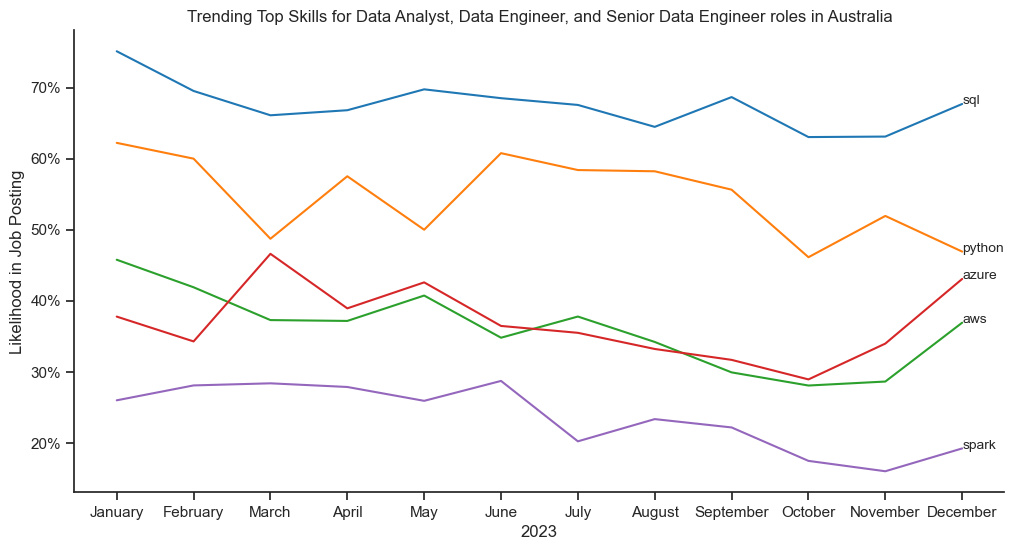

In [13]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot.iloc[:, :5], dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analyst, Data Engineer, and Senior Data Engineer roles in Australia')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Annotate the end of the lines with skill names
for i in range(5):
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i], fontsize=10)

plt.show()

In [7]:
# Filter DataFrame for 'Data Analyst' roles
df_DA = df[df['job_title'] == 'Data Analyst']
df_DA_DE_SDE_AUS = df[df['job_title'].isin(['Data Analyst', 'Data Engineer', 'Senior Data Engineer']) & (df['job_country'] == 'Australia')]

# Use value_counts() to get total count of 'Data Analyst' roles in US and Australia
count_DA_by_country = df_DA['job_country'].value_counts()

# Extract counts for United States and Australia
count_DA_US = count_DA_by_country.get('United States', 0)  # Get count for United States, defaulting to 0 if not found
count_DA_AUS = count_DA_by_country.get('Australia', 0)  # Get count for Australia, defaulting to 0 if not found
count_DA_DE_SDE_AUS = df_DA_DE_SDE_AUS.shape[0]

# Print the counts
print(f"Total number of Data Analyst roles in United States: {count_DA_US}")
print(f"Total number of Data Analyst roles in Australia: {count_DA_AUS}")
print(f"Total number of Data Analyst, Data Engineer, and Senior Data Engineer roles in Australia: {count_DA_DE_SDE_AUS}")

Total number of Data Analyst roles in United States: 14086
Total number of Data Analyst roles in Australia: 464
Total number of Data Analyst, Data Engineer, and Senior Data Engineer roles in Australia: 3000
